0.5 0.6 0.01


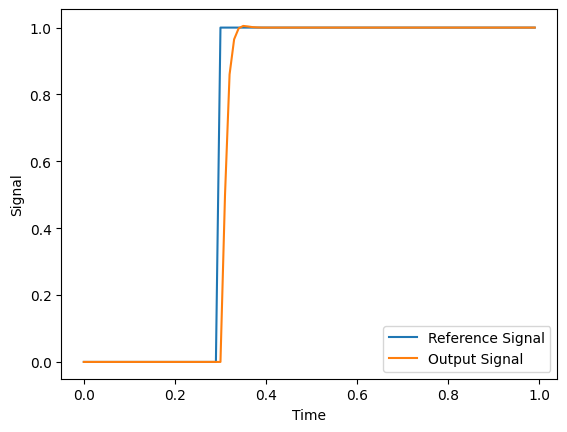

In [14]:
import numpy as np
import time
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import *

master = tk.Tk()
p = tk.DoubleVar()
i = tk.DoubleVar()
d = tk.DoubleVar()
kp = Scale(master, label = "Proportional", from_=0.00, to=1.00, orient = HORIZONTAL, length = 300, digits = 3, resolution = .01, variable = p)
kp.pack()
ki = Scale(master, label = "Integral", from_=0.00, to = 1.00, orient = HORIZONTAL, length = 300, digits = 3, resolution = .01, variable = i)
ki.pack()
kd = Scale(master, label = "Derivative", from_=0.00, to = 1.00, orient = HORIZONTAL, length = 300, digits = 3, resolution = .01, variable = d)
kd.pack()


master.mainloop()
Kp = p.get()
Ki = i.get()
Kd = d.get()
print(Kp, Ki, Kd)
'''
Kp = 0.5
Ki = 0.6
Kd = 0.01
'''
d_error = 0
last_error = 0
sum_error = 0

step_time = 0.01
times = np.arange(0,1,step_time)

signal_length = len(times)

target = np.hstack((np.zeros((1,30)),np.ones((1,70))))
target = np.array(target[0])

output = (np.zeros((1,signal_length)))[0]
start = 0

for i in range(len(times)):
  error =  (target[i] - output[i])
  if i != (len(times) -1):
    output[i+1] = Kp * error + Ki * sum_error + Kd * d_error

  #calculate derivative error
  d_error = (error - last_error)

  #integrated error
  sum_error += error
  last_error = error


plt.figure()
plt.plot(times,target,label='Reference Signal')
plt.plot(times,output,label='Output Signal')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()

